In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # Need for fitting
import numpy as np
from IPython.display import display, Markdown # Latex output
 
# Fitting function
def lorentzian(f, I, f_0, S):
    return I/(1+((f-f_0)/S)**2)
 
cond_1 = np.loadtxt("lorentziana_4.7_nF.txt")

# x and y data points    
x = cond_1[:,0]
y = cond_1[:,1]

# Plot data points
plt.plot(x, y, 'bo', label='Experimental\ndata')   
 
# Performing curve-fitting
popt, pcov = curve_fit(lorentzian, x, y)
display(Markdown('fitting\nparameters:\n\n I = %5.3f,\n\n $\omega_0$ = %5.3f,\n\n S = %5.3f' %tuple(popt)))
 
# x values for the fitted function
xFit = np.arange(0.8, 1.25, 0.0001)
 
# Plot the fitted function
plt.plot(xFit, lorentzian(xFit, *popt), 'r', label='Fit parameters:\n\n I = %5.3f,\n $\omega_0$ = %5.3f,\n S = %5.3f' % tuple(popt))
 
plt.xlabel('$\\dfrac{\omega}{\omega_0}$')
plt.ylabel('Normalized Gain')
plt.legend()
plt.savefig('lorentzian_fit_4.7_nF.pdf')
plt.show()

OSError: lorentziana_4.7_nF.txt not found.

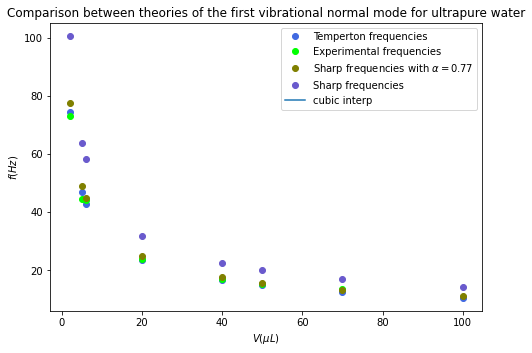

In [7]:
from scipy.interpolate import interp1d

%matplotlib inline
import pandas as pd
import numpy as np

interpolation_time = np.linspace(0, 1, 50)
scatter=pd.read_csv('Points.txt')

ft_0 = scatter.volume
ft_1 = scatter.f_Temperton
ft_2 = scatter.f_sperimentale
ft_3 = scatter.f_Sharp_correzione
ft_4 = scatter.f_Sharp

cubic_interp = interp1d(ft_0, ft_2, kind='cubic', fill_value="extrapolate")
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.plot(ft_0, ft_1, 'o', color='royalblue', label='Temperton frequencies')
plt.plot(ft_0, ft_2, 'o', color='lime', label='Experimental frequencies')
plt.plot(ft_0, ft_3, 'o', color='olive', label='Sharp frequencies with $\\alpha=0.77$')
plt.plot(ft_0, ft_4, 'o', color='slateblue', label='Sharp frequencies')
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time, cubic_results, label='cubic interp')

plt.title('Comparison between theories of the first vibrational normal mode for ultrapure water')
plt.xlabel('$V (\mu L)$')
plt.ylabel('$f (Hz)$')
plt.legend()
plt.show()

ax.set_title('scatter plot')
plt.show()

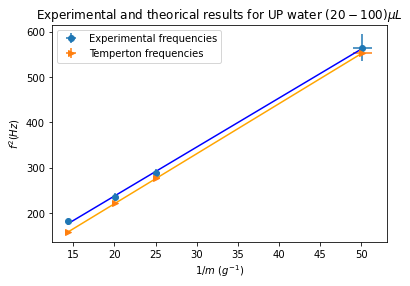

In [5]:
acqua=pd.read_csv('Acqua.txt')

x = acqua.m
y = acqua.sperimentali
z = acqua.teoriche
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = acqua.errEx
zerror = acqua.errF
xerror = acqua.errM
plt.errorbar(x, y, yerr=yerror, xerr=xerror, errorevery=1, fmt='o',label='Experimental frequencies')
plt.errorbar(x, z, yerr=zerror, xerr=xerror, errorevery=1, fmt='>',label='Temperton frequencies')

plt.plot(x, m*x + b, 'blue')
plt.plot(x, r*x + g, 'orange')
plt.title('Experimental and theorical results for UP water $(20-100)\mu L$')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()

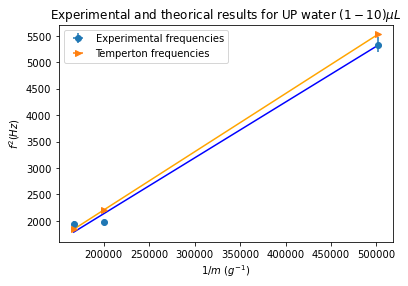

In [13]:

acqua=pd.read_csv('Acqualight.txt')

x = acqua.m
y = acqua.sperimentali
z = acqua.teoriche
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = acqua.errEx
xerror = acqua.errM
plt.errorbar(x, y, yerr=yerror, xerr=xerror, errorevery=1, fmt='o',label='Experimental frequencies')
plt.errorbar(x, z,  xerr=xerror, errorevery=1, fmt='>',label='Temperton frequencies')

plt.plot(x, m*x + b, 'blue')
plt.plot(x, r*x + g, 'orange')
plt.title('Experimental and theorical results for UP water $(1-10)\mu L$')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()


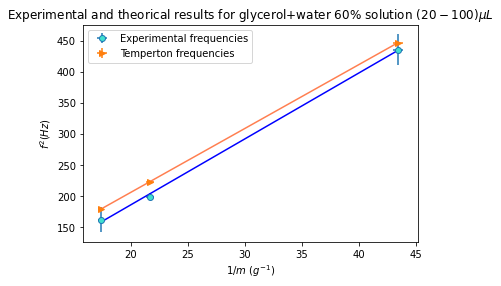

In [40]:
gly60=pd.read_csv('gly60.txt')

x = gly60.m
x
y = gly60.fsperimentali
y
z = gly60.Fteoriche
z
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = gly60.errEx
zerror = gly60.errT
xerror=gly60.errM
plt.errorbar(x, y, yerr=yerror, xerr=xerror, errorevery=1, fmt='o', markerfacecolor='turquoise',label='Experimental frequencies')
plt.errorbar(x, z, yerr=zerror,xerr=xerror, errorevery=1, fmt='>',label='Temperton frequencies')

plt.plot(x, m*x + b, 'blue')
plt.plot(x, r*x + g, 'coral')
plt.title('Experimental and theorical results for glycerol+water 60% solution $(20-100)\mu L$')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()

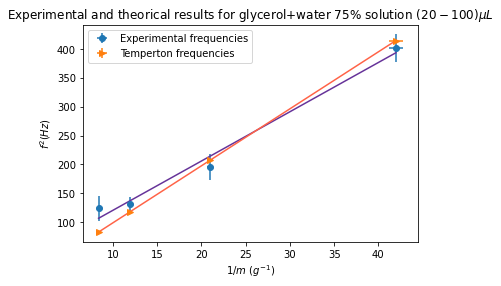

In [43]:
gly70=pd.read_csv('gly70.txt')

x = gly70.m
y = gly70.fsperimentali
z = gly70.Fteoriche
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = gly70.errEx
zerror = gly70.errT
xerror=gly70.errM
plt.errorbar(x, y, yerr=yerror, xerr=xerror, errorevery=1, fmt='o',label='Experimental frequencies')
plt.errorbar(x, z, yerr=zerror, xerr=xerror, errorevery=1, fmt='>',label='Temperton frequencies')

plt.plot(x, m*x + b, 'rebeccapurple')
plt.plot(x, r*x + g, 'tomato')
plt.title('Experimental and theorical results for glycerol+water 75% solution $(20-100)\mu L$')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()

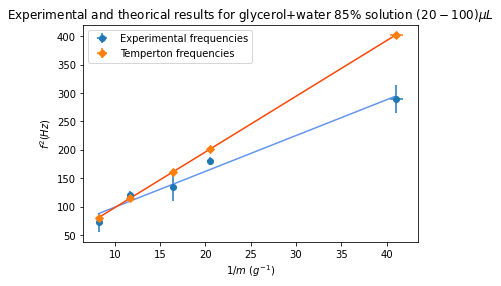

In [11]:
gly85=pd.read_csv('gly85.txt')

x = gly85.m
y = gly85.fsperimentali
z = gly85.Fteoriche
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = gly85.errEx
zerror = gly85.errT
xerror=gly85.errM
plt.errorbar(x, y, yerr=yerror,xerr=xerror, errorevery=1, fmt='o',label='Experimental frequencies')
plt.errorbar(x, z, yerr=zerror,xerr=xerror, errorevery=1, fmt='D',label='Temperton frequencies')

plt.plot(x, m*x + b, 'cornflowerblue')
plt.plot(x, r*x + g, 'orangered')
plt.title('Experimental and theorical results for glycerol+water 85% solution $(20-100)\mu L$')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()

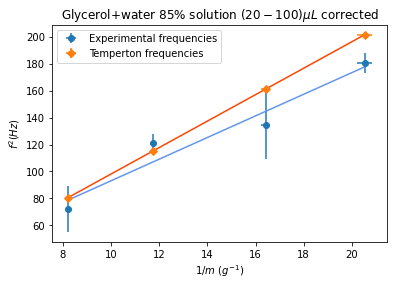

In [16]:
gly85c=pd.read_csv('gly85c.txt')

x = gly85c.m
y = gly85c.fsperimentali
z = gly85c.Fteoriche
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x, z, 1)
yerror = gly85c.errEx
zerror = gly85c.errT
xerror=gly85c.errM
plt.errorbar(x, y, yerr=yerror,xerr=xerror, errorevery=1, fmt='o',label='Experimental frequencies')
plt.errorbar(x, z, yerr=zerror,xerr=xerror, errorevery=1, fmt='D',label='Temperton frequencies')

plt.plot(x, m*x + b, 'cornflowerblue')
plt.plot(x, r*x + g, 'orangered')
plt.title('Glycerol+water 85% solution $(20-100)\mu L$ corrected')
plt.xlabel('$1/m\ (g^{-1})$')
plt.ylabel('$f^2 (Hz)$')
plt.legend()
plt.show()

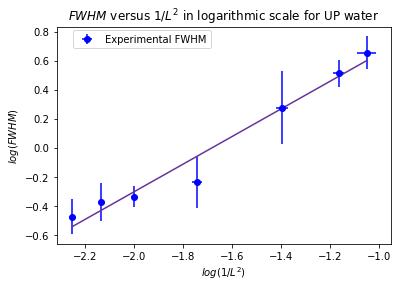

In [20]:
Visca=pd.read_csv('Visca.txt')

x = Visca.LogL
y = Visca.FWHM
m, b = np.polyfit(x, y, 1)
xerror = Visca.errL
yerror = Visca.errFWHM
plt.errorbar(x, y, xerr=xerror, yerr=yerror, errorevery=1, fmt='ob',label='Experimental FWHM')
plt.plot(x, m*x + b, 'rebeccapurple')
plt.title('$FWHM$ versus $1/L^2$ in logarithmic scale for UP water')
plt.xlabel('$log(1/L^2)$')
plt.ylabel('$log(FWHM)$')
plt.legend(loc=(0.05, 0.90))
plt.show()

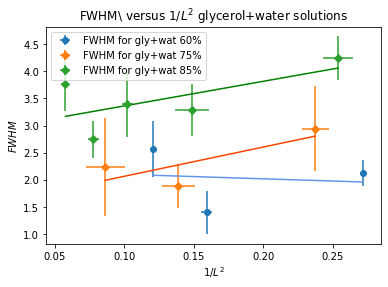

In [49]:
viscAltri=pd.read_csv('viscAltri.txt')
viscA7=pd.read_csv('viscA7.txt')
viscA8=pd.read_csv('viscA8.txt')
x = viscAltri.L1
y = viscAltri.gli6
x2 = viscA7.L2
y2 = viscA7.gli7
x3 = viscA8.L3
y3 = viscA8.gli8
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x2, y2, 1)
a, c = np.polyfit(x3, y3, 1)
yerror = viscAltri.err6
xerror=viscAltri.errL1
y2error = viscA7.err7
x2error=viscA7.errL2
y3error = viscA8.err8
x3error=viscA8.errL3
plt.errorbar(x, y, yerr=yerror,xerr=xerror, errorevery=1, fmt='o',label='FWHM for gly+wat 60%')
plt.errorbar(x2, y2, yerr=y2error,xerr=x2error, errorevery=1, fmt='D',label='FWHM for gly+wat 75%')
plt.errorbar(x3, y3, yerr=y3error,xerr=x3error, errorevery=1, fmt='D',label='FWHM for gly+wat 85%')

plt.plot(x, m*x + b, 'cornflowerblue')
plt.plot(x2, r*x2 + g, 'orangered')
plt.plot(x3, a*x3 + c, 'green')
plt.title('FWHM\ versus $1/L^2$ glycerol+water solutions')
plt.xlabel('$1/L^2$')
plt.ylabel('$FWHM$')
plt.legend()
plt.show()

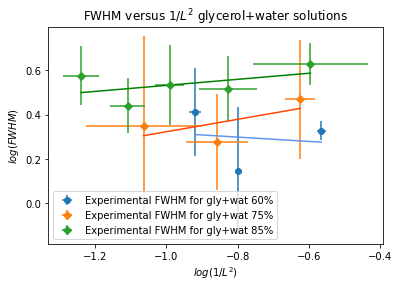

In [48]:
#scala logaritmica
viscAltri=pd.read_csv('viscAltrilog.txt')
viscA7=pd.read_csv('viscA7log.txt')
viscA8=pd.read_csv('viscA8log.txt')
x = viscAltri.L1
y = viscAltri.gli6
x2 = viscA7.L2
y2 = viscA7.gli7
x3 = viscA8.L3
y3 = viscA8.gli8
m, b = np.polyfit(x, y, 1)
r, g = np.polyfit(x2, y2, 1)
a, c = np.polyfit(x3, y3, 1)
yerror = viscAltri.err6
xerror=viscAltri.errL1
y2error = viscA7.err7
x2error=viscA7.errL2
y3error = viscA8.err8
x3error=viscA8.errL3
plt.errorbar(x, y, yerr=yerror,xerr=xerror, errorevery=1, fmt='o',label='Experimental FWHM for gly+wat 60%')
plt.errorbar(x2, y2, yerr=y2error,xerr=x2error, errorevery=1, fmt='D',label='Experimental FWHM for gly+wat 75%')
plt.errorbar(x3, y3, yerr=y3error,xerr=x3error, errorevery=1, fmt='D',label='Experimental FWHM for gly+wat 85%')

plt.plot(x, m*x + b, 'cornflowerblue')
plt.plot(x2, r*x2 + g, 'orangered')
plt.plot(x3, a*x3 + c, 'green')
plt.title('FWHM versus $1/L^2$ glycerol+water solutions')
plt.xlabel('$log(1/L^2)$')
plt.ylabel('$log(FWHM)$')
plt.legend()
plt.show()